In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [ ]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
print(df.info()," ", test.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df.drop(['PoolQC','MiscFeature', 'Alley','Fence',],axis = 1,inplace = True)

df['MasVnrType'].fillna('None', inplace = True)
df['FireplaceQu'].fillna('None', inplace = True)
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df['GarageType'].fillna('None', inplace = True)
df['GarageYrBlt'].fillna(0,inplace = True)
df['GarageFinish'].fillna('None',inplace = True)
df['GarageQual'].fillna('None', inplace = True)
df['GarageCond'].fillna('None',inplace = True)
df['BsmtExposure'].fillna('None',inplace = True)
df['BsmtQual'].fillna('None',inplace = True)
df['BsmtFinType1'].fillna('None',inplace = True)
df['BsmtFinType2'].fillna('None',inplace = True)
df['BsmtCond'].fillna('None',inplace = True)
df['MasVnrArea'].fillna(0,inplace = True)
df['Electrical'].fillna(df['Electrical'].mode()[0],inplace = True)


<ipython-input-12-19b808e1d7eb>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MasVnrType'].fillna('None', inplace = True)
<ipython-input-12-19b808e1d7eb>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
test.drop(['PoolQC','MiscFeature', 'Alley','Fence',],axis = 1,inplace = True)

test['MasVnrType'].fillna('None', inplace = True)
test['FireplaceQu'].fillna('None', inplace = True)
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
test['GarageType'].fillna('None', inplace = True)
test['GarageYrBlt'].fillna(0,inplace = True)
test['GarageFinish'].fillna('None',inplace = True)
test['GarageQual'].fillna('None', inplace = True)
test['GarageCond'].fillna('None',inplace = True)
test['BsmtExposure'].fillna('None',inplace = True)
test['BsmtQual'].fillna('None',inplace = True)
test['BsmtFinType1'].fillna('None',inplace = True)
test['BsmtFinType2'].fillna('None',inplace = True)
test['BsmtCond'].fillna('None',inplace = True)
test['MasVnrArea'].fillna(0,inplace = True)
test['Electrical'].fillna(test['Electrical'].mode()[0],inplace = True)
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['Functional'] = test['Functional'].fillna(test['Functional'].mode()[0])
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean())
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(test['BsmtFullBath'].mean())
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mean())
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mean())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())



<ipython-input-13-b85fb9abddc6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['MasVnrType'].fillna('None', inplace = True)
<ipython-input-13-b85fb9abddc6>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [ ]:
num_col = df.select_dtypes(include=['int64','float64'])
num_col.index = num_col['Id']
num_col.drop('Id',axis=1,inplace = True)
cat_col = df.select_dtypes(include='object')

In [ ]:
new_df = df.copy()
saleprice = new_df['SalePrice']
new_test = test.copy()

In [ ]:
cat_col.nunique().sort_values(ascending=False)

,0
Neighborhood,25
Exterior2nd,16
Exterior1st,15
Condition1,9
SaleType,9
RoofMatl,8
Condition2,8
HouseStyle,8
BsmtFinType2,7
BsmtFinType1,7


In [ ]:
oe = OrdinalEncoder(categories =[['Po', 'Fa', 'TA', 'Gd', 'Ex']])
new_df['ExterQual'] = oe.fit_transform(new_df[['ExterQual']])
new_df['ExterCond'] = oe.fit_transform(new_df[['ExterCond']])
new_df['HeatingQC'] = oe.fit_transform(new_df[['HeatingQC']])
new_df['KitchenQual'] = oe.fit_transform(new_df[['KitchenQual']])

new_test['ExterQual'] = oe.fit_transform(new_test[['ExterQual']])
new_test['ExterCond'] = oe.fit_transform(new_test[['ExterCond']])
new_test['HeatingQC'] = oe.fit_transform(new_test[['HeatingQC']])
new_test['KitchenQual'] = oe.fit_transform(new_test[['KitchenQual']])

oe = OrdinalEncoder(categories = [['None','Po', 'Fa', 'TA', 'Gd', 'Ex']])
new_df['BsmtQual'] = oe.fit_transform(new_df[['BsmtQual']])
new_df['BsmtCond'] = oe.fit_transform(new_df[['BsmtCond']])
new_df['FireplaceQu'] = oe.fit_transform(new_df[['FireplaceQu']])
new_df['GarageQual'] = oe.fit_transform(new_df[['GarageQual']])
new_df['GarageCond'] = oe.fit_transform(new_df[['GarageCond']])

new_test['BsmtQual'] = oe.fit_transform(new_test[['BsmtQual']])
new_test['BsmtCond'] = oe.fit_transform(new_test[['BsmtCond']])
new_test['FireplaceQu'] = oe.fit_transform(new_test[['FireplaceQu']])
new_test['GarageQual'] = oe.fit_transform(new_test[['GarageQual']])
new_test['GarageCond'] = oe.fit_transform(new_test[['GarageCond']])

oe = OrdinalEncoder(categories = [['None', 'No','Mn','Av','Gd']])
new_df['BsmtExposure'] = oe.fit_transform(new_df[['BsmtExposure']])

new_test['BsmtExposure'] = oe.fit_transform(new_test[['BsmtExposure']])


oe = OrdinalEncoder(categories= [['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ']])
new_df['BsmtFinType1'] = oe.fit_transform(new_df[['BsmtFinType1']])
new_df['BsmtFinType2'] = oe.fit_transform(new_df[['BsmtFinType2']])

new_test['BsmtFinType1'] = oe.fit_transform(new_test[['BsmtFinType1']])
new_test['BsmtFinType2'] = oe.fit_transform(new_test[['BsmtFinType2']])


oe = OrdinalEncoder(categories=[['N','Y']])
new_df['CentralAir'] = oe.fit_transform(new_df[['CentralAir']])

new_test['CentralAir'] = oe.fit_transform(new_test[['CentralAir']])


oe = OrdinalEncoder(categories=[['N','P','Y']])
new_df['PavedDrive'] = oe.fit_transform(new_df[['PavedDrive']])

new_test['PavedDrive'] = oe.fit_transform(new_test[['PavedDrive']])


oe = OrdinalEncoder(categories=[['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']])
new_df['Functional'] = oe.fit_transform(new_df[['Functional']])

new_test['Functional'] = oe.fit_transform(new_test[['Functional']])


oe = OrdinalEncoder(categories=[['None', 'Unf', 'RFn', 'Fin']])
new_df['GarageFinish'] = oe.fit_transform(new_df[['GarageFinish']])

new_test['GarageFinish'] = oe.fit_transform(new_test[['GarageFinish']])

In [ ]:
corr = new_df.select_dtypes(include=['int','float']).corr()

<Axes: >

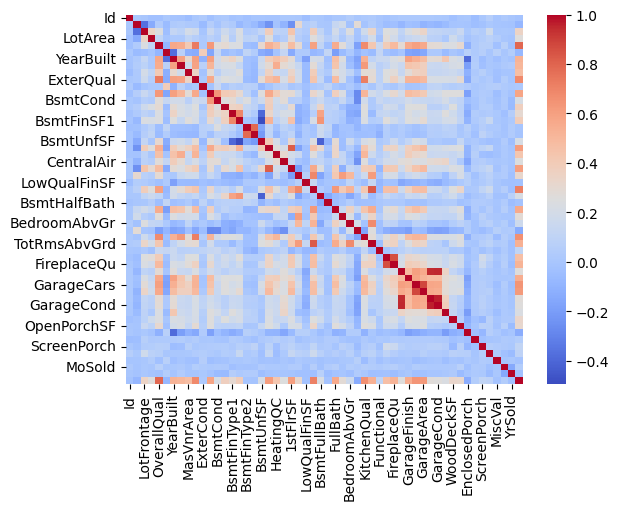

In [ ]:
sns.heatmap(corr,cmap='coolwarm')

In [ ]:
cols = list(corr['SalePrice'].sort_values(ascending=False)[1:16].keys())
cols

['OverallQual',
 'GrLivArea',
 'ExterQual',
 'KitchenQual',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'BsmtQual',
 'FullBath',
 'GarageFinish',
 'TotRmsAbvGrd',
 'YearBuilt',
 'FireplaceQu',
 'YearRemodAdd']

In [ ]:
# Seperating numerical data from the dataframe in order with the correlation with SalePrice

b = saleprice
a = new_df[cols].copy()

a_train, a_test, b_train, b_test = train_test_split(a,b,test_size = 0.2, train_size = 0.8,random_state = 0)
print(a_train.shape,'  ', a_test.shape,'  ', b_train.shape,'  ', b_test.shape)

(1168, 15)    (292, 15)    (1168,)    (292,)


In [ ]:
print(list(a_train.columns))

['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'BsmtQual', 'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'YearBuilt', 'FireplaceQu', 'YearRemodAdd']


In [ ]:
# Evaluating Linear Regression model
model = LinearRegression()
model.fit(a_train,b_train)
pred_lr = model.predict(a_test)

print("R2 Score:", r2_score(b_test, pred_lr))
print("MSE:", mean_squared_error(b_test, pred_lr))

R2 Score: 0.6659351378862352
MSE: 2307001816.003199


In [ ]:
# Evaluating with Random Forest to get better accuracy

rf = RandomForestRegressor(n_estimators=100, random_state = 42)
rf.fit(a_train,b_train)
pred = rf.predict(a_test)

print("R2 Score:", r2_score(b_test, pred))
print("MSE:", mean_squared_error(b_test, pred))

R2 Score: 0.8535478205844469
MSE: 1011376777.9451416


In [ ]:
# Testing multiple parameters of Random Forest to get the best model for best accuracy

from concurrent.futures import ProcessPoolExecutor
import itertools

def evaluate_model(params):
    i, j, k= params
    rf = RandomForestRegressor(n_estimators=i, max_depth=j, min_samples_leaf=k, n_jobs=-1,random_state = 25)
    rf.fit(a_train, b_train)
    pred = rf.predict(a_test)
    score = r2_score(b_test, pred)
    mse = mean_squared_error(b_test, pred)
    return (score, mse, i, j, k)

param_combinations = list(itertools.product(range(100, 600, 100), range(10, 40, 10), range(1, 6)))

best_score = 0
best_params = None

with ProcessPoolExecutor() as executor:
    results = executor.map(evaluate_model, param_combinations)

    for score, mse, i, j, k in results:
        if score > best_score:
            best_score = score
            best_params = (i, j, k)

print("\nBest Score:", best_score)
print("Best Parameters: n_estimators =", best_params[0], ", max_depth =", best_params[1], ", min_samples_leaf =", best_params[2])


In [ ]:
rf = RandomForestRegressor(n_estimators=50, max_depth = 30, min_samples_leaf = 1, random_state = 25)
rf.fit(a_train,b_train)
pred = rf.predict(a_test)

print("R2 Score:", r2_score(b_test, pred))
print("MSE:", mean_squared_error(b_test, pred))

R2 Score: 0.8718712392865315
MSE: 884837997.5609279


In [ ]:
model = xgb.XGBRegressor(n_estimators=40, learning_rate=0.1, max_depth=4, subsample=0.8, colsample_bytree=0.8, random_state=42)
model.fit(a_train, b_train)
pred = model.predict(a_test)

print("R2 Score:", r2_score(b_test, pred))
print("MSE:", mean_squared_error(b_test, pred))

R2 Score: 0.8892691731452942
MSE: 764690432.0


In [ ]:
#save machine learning model
import joblib

joblib.dump(model,'house_price_model.pkl')

['house_price_model.pkl']